In [2]:
##ETS DECOMPOSITION
#import libs
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline
ts = pd.read_csv('/home/alessio/Scaricati/Responsetime.csv', header=0, parse_dates=[0], index_col=0)
tsr=ts.resample(rule='30S').mean().dropna()
tsr

,"{container=""booking-service"", endpoint=""http-traffic"", instance=""172.17.0.13:8080"", job=""booking-service"", namespace=""default"", pod=""booking-service-7fd5fdfb9f-zwbgk"", service=""booking-service""}"
Time,
2022-01-23 00:00:30,19.40
2022-01-23 00:01:00,17.00
2022-01-23 00:01:30,41.00
2022-01-23 00:02:00,25.50
2022-01-23 00:02:30,30.70
...,...
2022-01-23 09:07:30,4.75
2022-01-23 09:08:00,4.90
2022-01-23 09:08:30,4.67


In [3]:
tsr_n = tsr.iloc[250:]

tsr_n

,"{container=""booking-service"", endpoint=""http-traffic"", instance=""172.17.0.13:8080"", job=""booking-service"", namespace=""default"", pod=""booking-service-7fd5fdfb9f-zwbgk"", service=""booking-service""}"
Time,
2022-01-23 02:05:30,4.33
2022-01-23 02:06:00,4.27
2022-01-23 02:06:30,4.83
2022-01-23 02:07:00,4.82
2022-01-23 02:07:30,4.19
...,...
2022-01-23 09:07:30,4.75
2022-01-23 09:08:00,4.90
2022-01-23 09:08:30,4.67


In [4]:
train_data=tsr_n.iloc[:764]
test_data=tsr_n.iloc[764:]

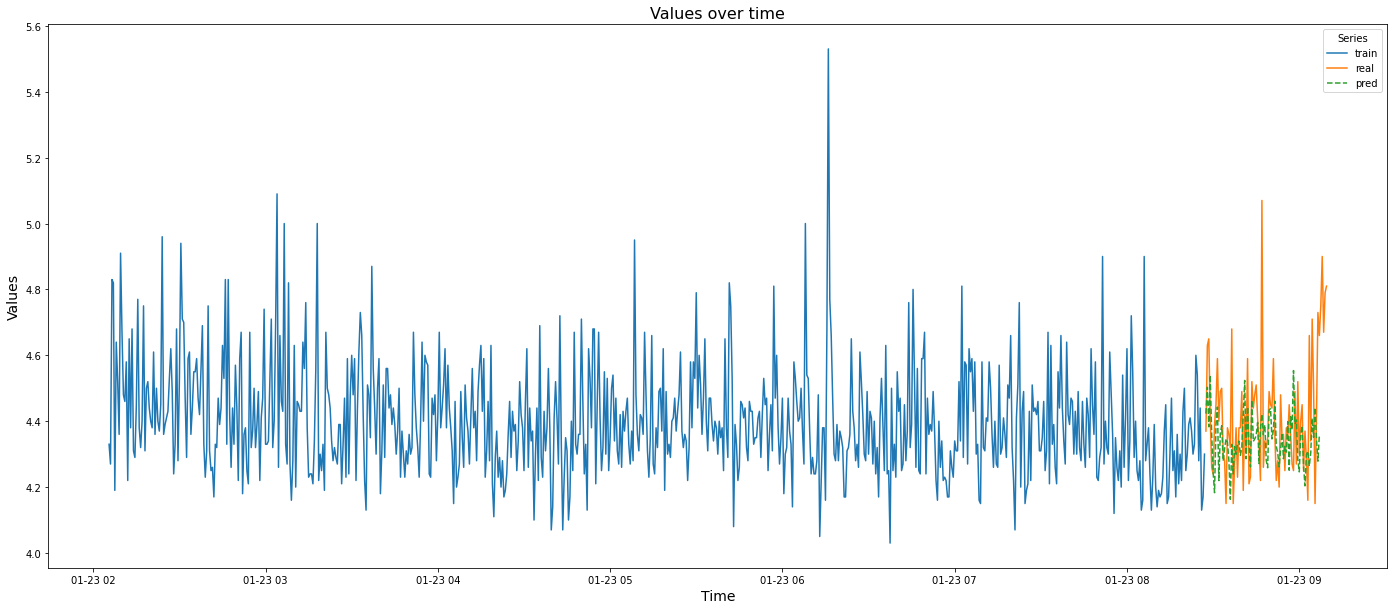

In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
tsmodel=ExponentialSmoothing(train_data, trend='add', seasonal='add',seasonal_periods=197).fit()
tsmodel140=ExponentialSmoothing(train_data, trend='add', seasonal='add',seasonal_periods=140).fit()
tsmodel144=ExponentialSmoothing(train_data, trend='add', seasonal='add',seasonal_periods=144).fit()
tsmodel146=ExponentialSmoothing(train_data, trend='add', seasonal='add',seasonal_periods=146).fit()
tsmodel149=ExponentialSmoothing(train_data, trend='add', seasonal='add',seasonal_periods=149).fit()
tsmodel156=ExponentialSmoothing(train_data, trend='add', seasonal='add',seasonal_periods=156).fit()
tsmodel161=ExponentialSmoothing(train_data, trend='add', seasonal='add',seasonal_periods=161).fit()
tsmodel195=ExponentialSmoothing(train_data, trend='add', seasonal='add',seasonal_periods=195).fit()
tsmodel197=ExponentialSmoothing(train_data, trend='add', seasonal='add',seasonal_periods=197).fit()
tsmodel200=ExponentialSmoothing(train_data, trend='add', seasonal='add',seasonal_periods=200).fit()
#140
#144
#146
#149
#156
#161
#195?
#197 belli è macari 198

#200
prediction=tsmodel.forecast(80)

prediction140=tsmodel140.forecast(85)
prediction144=tsmodel144.forecast(85)
prediction146=tsmodel146.forecast(85)
prediction149=tsmodel149.forecast(85)
prediction156=tsmodel156.forecast(85)
prediction161=tsmodel161.forecast(85)
prediction195=tsmodel195.forecast(85)
prediction197=tsmodel197.forecast(85)
prediction200=tsmodel200.forecast(85)


plt.figure(figsize=(24,10))
plt.ylabel('Values',fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Values over time',fontsize=16)
plt.plot(train_data,"-",label='train')
plt.plot(test_data,"-",label='real')
plt.plot(prediction,"--",label='pred')
plt.legend(title='Series')

In [6]:
#Evaluate the model (min 1.18.50)
from sklearn.metrics import mean_squared_error
#140
#144
#146
#149
#156
#161
#195?
#197 belli è macari 198

#200

labels = ['ES(140)','ES(144)','ES(146)','ES(149)','ES(156)','ES(161)','ES(195)','ES(197)','ES(200)']
preds = [prediction140, prediction144, prediction146, prediction149, prediction156, prediction161, prediction195, prediction197,prediction200]

for i in range(9):
    error = mean_squared_error(test_data, preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

ES(140) Error: 0.04873261755
ES(144) Error: 0.04145718391
ES(146) Error: 0.03974076773
ES(149) Error: 0.04551963979
ES(156) Error: 0.0498872775
ES(161) Error: 0.05115171209
ES(195) Error: 0.04197352437
ES(197) Error: 0.03824938802
ES(200) Error: 0.04659674197


In [7]:
tsr.describe()

,"{container=""booking-service"", endpoint=""http-traffic"", instance=""172.17.0.13:8080"", job=""booking-service"", namespace=""default"", pod=""booking-service-7fd5fdfb9f-zwbgk"", service=""booking-service""}"
count,1099.000000
mean,4.829709
std,1.890742
min,4.030000
25%,4.310000
50%,4.430000
75%,4.670000
max,41.000000
